In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Baca data dari file CSV
data = pd.read_csv('data_final.csv')

In [4]:
# Menambahkan data baru ke data_final
data_final =data.drop_duplicates()
data_final["Siap Diving"].value_counts()

Siap Diving
1    42
0    42
Name: count, dtype: int64

In [5]:
data_final

,Masalah Pernafasan/Jantung/Covid,Umur > 45 Tahun,Tidak Dapat Olahraga Ringan,Masalah Mata/Telinga/Sinus,Operasi Terakhir 12 Bulan,Masalah Neurologis,Perawatan Psikologis,Masalah Punggung/Diabetes,Masalah Perut/Usus,Mengonsumsi Obat,Siap Diving
0,0,1,0,0,0,0,1,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,1,1,0,0,1
3,1,0,0,1,0,1,1,0,1,0,1
4,0,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,0,0,0,0,0,0,1,0
80,1,1,0,1,1,1,1,1,1,1,0
81,1,1,1,1,0,1,1,1,1,1,0
82,1,1,1,1,1,1,1,1,1,0,0


In [10]:
X = data_final.drop(columns=['Siap Diving'])
y = data_final['Siap Diving']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
num_features = X_train.shape[1]

In [12]:
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(num_features,)),

    # Hidden Layer 1
    Dense(64, activation='relu', kernel_regularizer=l2(0.05)),  # Ukuran lebih besar untuk menangkap lebih banyak pola
    BatchNormalization(),
   
    
    # Hidden Layer 2
    Dense(32, activation='relu', kernel_regularizer=l2(0.04)),  # Regularisasi untuk menghindari overfitting
    BatchNormalization(),
    
    
    # Hidden Layer 3
    Dense(16, activation='relu', kernel_regularizer=l2(0.03)),  # Ukuran lebih kecil untuk menyaring fitur relevan
    BatchNormalization(),
   
    # Hidden Layer 3 - Ukuran layer dikurangi
    Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)), # Meningkatkan regularisasi
    BatchNormalization(),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

In [14]:
# Compile model dengan optimizer Adam dan learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:

# Callback Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metode pemantauan, dalam hal ini 'val_loss'
    patience=10,          # Berapa epoch tanpa peningkatan sebelum pelatihan berhenti
    restore_best_weights=True,  # Mengembalikan bobot terbaik setelah pelatihan selesai
    verbose=1             # Menampilkan log jika Early Stopping aktif
)

# Train the model with Early Stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Tambahkan data validasi
    epochs=100,
    batch_size=8,
    verbose=1,
    callbacks=[early_stopping]  # Tambahkan callback di sini
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4557 - loss: 4.4087 - val_accuracy: 0.5882 - val_loss: 4.1085
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5953 - loss: 4.1012 - val_accuracy: 0.5882 - val_loss: 4.0713
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7367 - loss: 3.9382 - val_accuracy: 0.5294 - val_loss: 4.0374
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7347 - loss: 3.8510 - val_accuracy: 0.5882 - val_loss: 4.0029
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8634 - loss: 3.7712 - val_accuracy: 0.5882 - val_loss: 3.9637
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8498 - loss: 3.7123 - val_accuracy: 0.5882 - val_loss: 3.9225
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8559 - loss: 3.6222 - val_accuracy: 0.5882 - val_loss: 3.8804
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8453 - loss: 3.6281 - val_accuracy: 0.6471 - val_loss: 3.838

In [18]:
# 9. Evaluasi model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.2476
Validation Loss: 1.2475768327713013
Validation Accuracy: 1.0


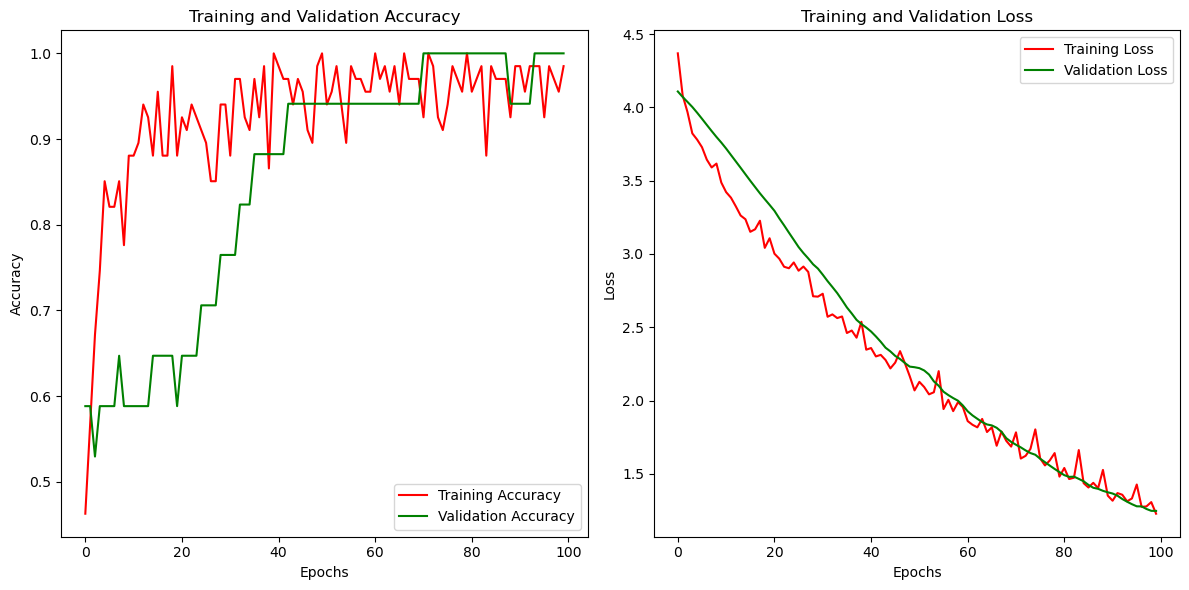

In [20]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plotting accuracy
    ax[0].plot(epochs, acc, 'r-', label='Training Accuracy')  # Red line for training
    ax[0].plot(epochs, val_acc, 'g-', label='Validation Accuracy')  # Green line for validation
    ax[0].set_title('Training and Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    
    # Plotting loss
    ax[1].plot(epochs, loss, 'r-', label='Training Loss')  # Red line for training
    ax[1].plot(epochs, val_loss, 'g-', label='Validation Loss')  # Green line for validation
    ax[1].set_title('Training and Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()

# After model training, you can call this function to plot the graphs:
# Assuming 'history' is the object returned from model.fit()
plot_loss_acc(history)


In [38]:
import numpy as np

# Data input baru (contoh)
# Masukkan data sesuai dengan urutan fitur Anda:
input_baru = np.array([[1, 0, 0, 1, 0, 0, 1, 1, 1, 0]])  # Sesuaikan dengan jumlah dan urutan fitur Anda

# Normalisasi input baru menggunakan scaler yang telah dilatih sebelumnya
input_baru_scaled = scaler.transform(input_baru)

# Prediksi menggunakan model
prediksi = model.predict(input_baru_scaled)

# Menampilkan hasil prediksi
probabilitas = prediksi[0][0]
hasil_akhir = int(probabilitas > 0.5)  # Konversi probabilitas menjadi 0 atau 1

print("Probabilitas Siap Diving:", probabilitas)
print("Prediksi Siap Diving (1) atau Tidak (0):", hasil_akhir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Probabilitas Siap Diving: 0.9533164
Prediksi Siap Diving (1) atau Tidak (0): 1


C:\Users\sufah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


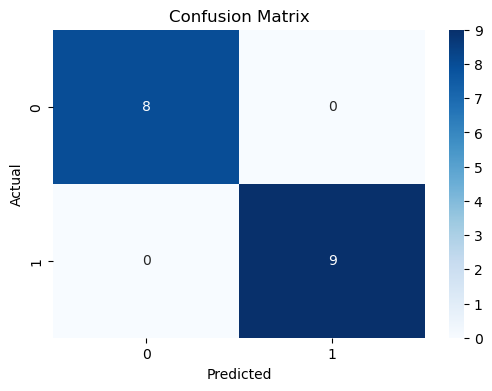

In [30]:

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val)

# Mengonversi probabilitas ke label biner (0 atau 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Menghitung confusion matrix
cm = confusion_matrix(y_val, y_pred_binary)

# Menampilkan confusion matrix menggunakan seaborn untuk visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Simpan model ke dalam format TFLite
model.save('model_siap_diving_nn.h5')  # Simpan model Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Konversi model ke TFLite
tflite_model = converter.convert()